<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">PROJET - Logement </h1>
</div>

**Votre tâche consiste à prédire les valeurs médianes des maisons dans les quartiers californiens, compte tenu d'un certain nombre de caractéristiques de ces les quartiers. (Pour une meilleure évaluation en utilisant "Pipeline", "Evaluation Cross-validation", "Grid search" ...**

<H1>Importation modules et méthodes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from statistics import mean

import folium


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import statsmodels.formula.api as smf

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from mpl_toolkits.mplot3d import Axes3D

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.svm import SVR

from sklearn.datasets import make_classification 

from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA

from sklearn.preprocessing import OneHotEncoder



In [2]:
def outlier_methode_interquartile(colonne,df):
    Q3 = df.describe()[colonne][6]
    Q1 = df.describe()[colonne][4]
    IQR = Q3 - Q1
    minimum = Q1 - 1.5 * IQR
    maximum = Q3 + 1.5 * IQR
    df = df.drop(df[df[colonne]<minimum].index)
    df = df.drop(df[df[colonne]>maximum].index)
    return df
def outlier_methode_ecart_type(colonne,df):
    df = df[np.abs(df[colonne]-df[colonne].mean())<=(3*df[colonne].std())]
    return df
def PolynomialRegression(degree=2):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression)

<H1>Importation des données

In [3]:
df = pd.read_csv('logement.csv')

In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<b>Il y a 207 valeurs manquantes dans la colonne "total_bedrooms".

<H1>Remplacement des valeurs manquantes

In [6]:
df_nan = df[df.total_bedrooms.isna()]
df_clean = df[~df.total_bedrooms.isna()]

In [7]:
X = df_clean.drop(columns=['total_bedrooms','ocean_proximity'])
Y = df_clean['total_bedrooms']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [9]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [10]:
lin_reg.score(X_test,y_test)

0.9700483233179297

<b>Le modele de regression linéaire presente un score satisfaisant, il sera donc utiliser pour remplacer nos valeurs manquantes

In [11]:
X2 = df_nan.drop(columns=['total_bedrooms','ocean_proximity'])
df_nan['total_bedrooms'] = lin_reg.predict(X2)

<ipython-input-11-f3d64ec41836>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['total_bedrooms'] = lin_reg.predict(X2)


In [12]:
df = pd.concat([df_clean, df_nan])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20484
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


<b>Il n'y a plus de valeurs nulles dans nos données.

<H1>Créations de trois nouvelles colonnes : <H1>

<b>bedrooms_by_households : Nombre de chambres par habitations

In [14]:
df["bedrooms_by_households"] = df["total_bedrooms"] / df["households"]

<b>population_by_households : Nombre de chambres par habitations

In [15]:
df["population_by_households"] = df["population"] / df["households"]

<b>rooms_by_households : Nombre de pieces par habitations

In [16]:
df["rooms_by_households"] = df["total_rooms"] / df["households"]

In [17]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_by_households,population_by_households,rooms_by_households
0,-122.23,37.88,41.0,880.0,129.000000,322.0,126.0,8.3252,452600.0,NEAR BAY,1.023810,2.555556,6.984127
1,-122.22,37.86,21.0,7099.0,1106.000000,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.971880,2.109842,6.238137
2,-122.24,37.85,52.0,1467.0,190.000000,496.0,177.0,7.2574,352100.0,NEAR BAY,1.073446,2.802260,8.288136
3,-122.25,37.85,52.0,1274.0,235.000000,558.0,219.0,5.6431,341300.0,NEAR BAY,1.073059,2.547945,5.817352
4,-122.25,37.85,52.0,1627.0,280.000000,565.0,259.0,3.8462,342200.0,NEAR BAY,1.081081,2.181467,6.281853
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,788.551250,3171.0,779.0,3.3409,220500.0,NEAR OCEAN,1.012261,4.070603,4.646983
20268,-119.18,34.19,19.0,2393.0,776.991579,1938.0,762.0,1.6953,167400.0,NEAR OCEAN,1.019674,2.543307,3.140420
20372,-118.88,34.17,15.0,4260.0,765.329834,1701.0,669.0,5.1033,410700.0,<1H OCEAN,1.143991,2.542601,6.367713
20460,-118.75,34.29,17.0,5512.0,879.394743,2734.0,814.0,6.6073,258100.0,<1H OCEAN,1.080338,3.358722,6.771499


<H1>Visualisation des outliers

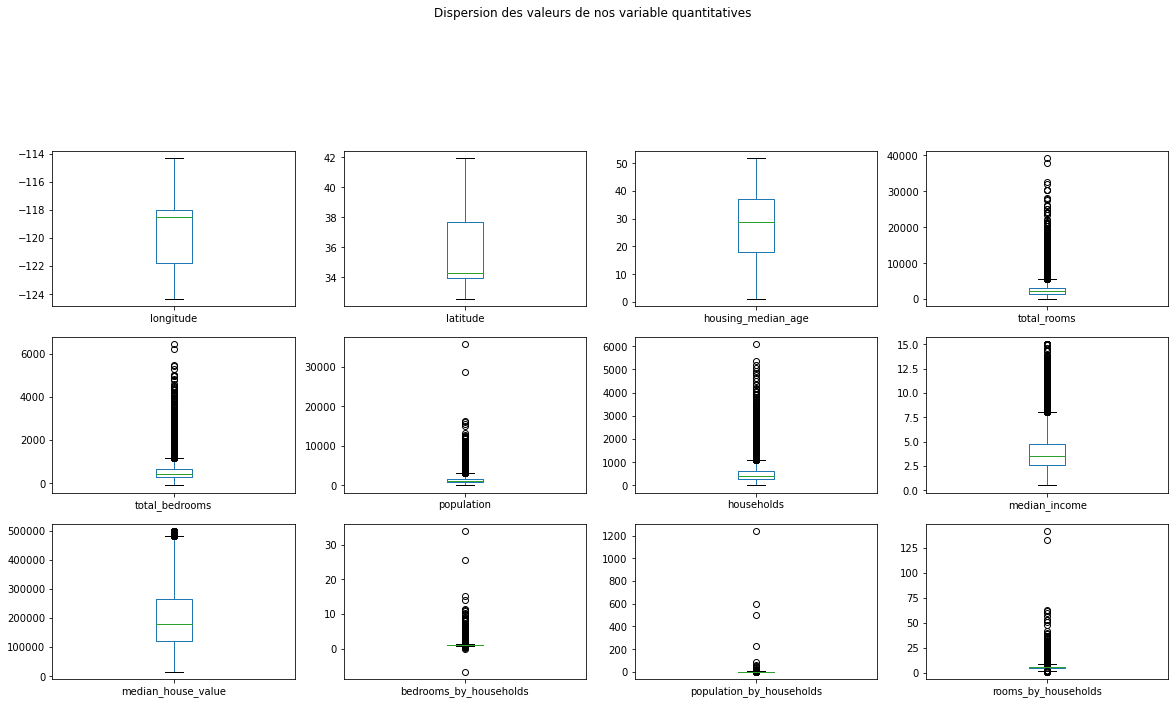

In [18]:
df.select_dtypes(include=float).plot(kind='box', subplots=True, title='Dispersion des valeurs de nos variable quantitatives', figsize=(20,20),layout=(6,4))
plt.show()

<H1>Suppressions des valeurs extremes avec la méthode ecartype 

Deux méthodes de détermination des valeurs extrêmes ont étés utilisées : 
- la méthode interquartiles : On élimine toutes les valeurs éloignés qui ne sont pas compris dans l'intervalle min-max (voir dans la definition de la fonction)
- la méthode écart-type : On élimine toutes les valeurs éloignés de plus de trois écart-type de la moyenne

On récupère 15105 lignes avec la méthode interquartile et 18748 lignes avec la méthode ecart type.

J'ai décidé de garder la méthode qui supprimait le moins de lignes.

In [19]:
for colonne in ['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value', 'bedrooms_by_households','population_by_households', 'rooms_by_households']:
    df = outlier_methode_ecart_type(colonne,df)


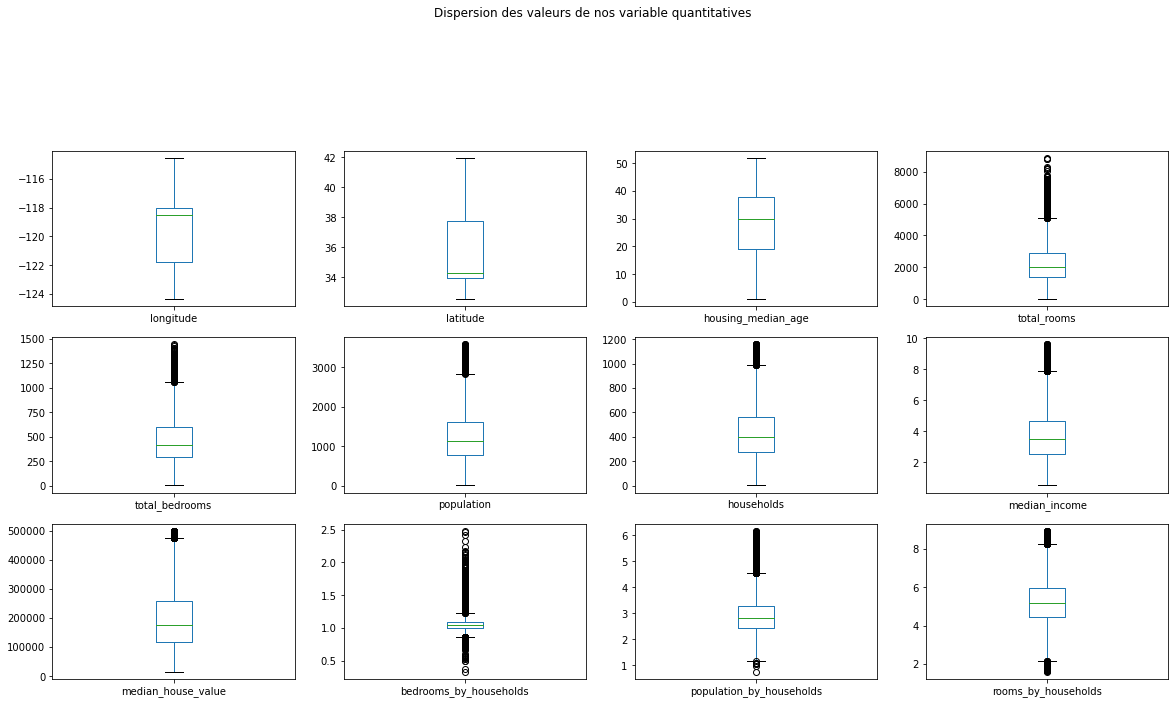

In [20]:
df.select_dtypes(include=float).plot(kind='box', subplots=True, title='Dispersion des valeurs de nos variable quantitatives', figsize=(20,20),layout=(6,4))
plt.show()

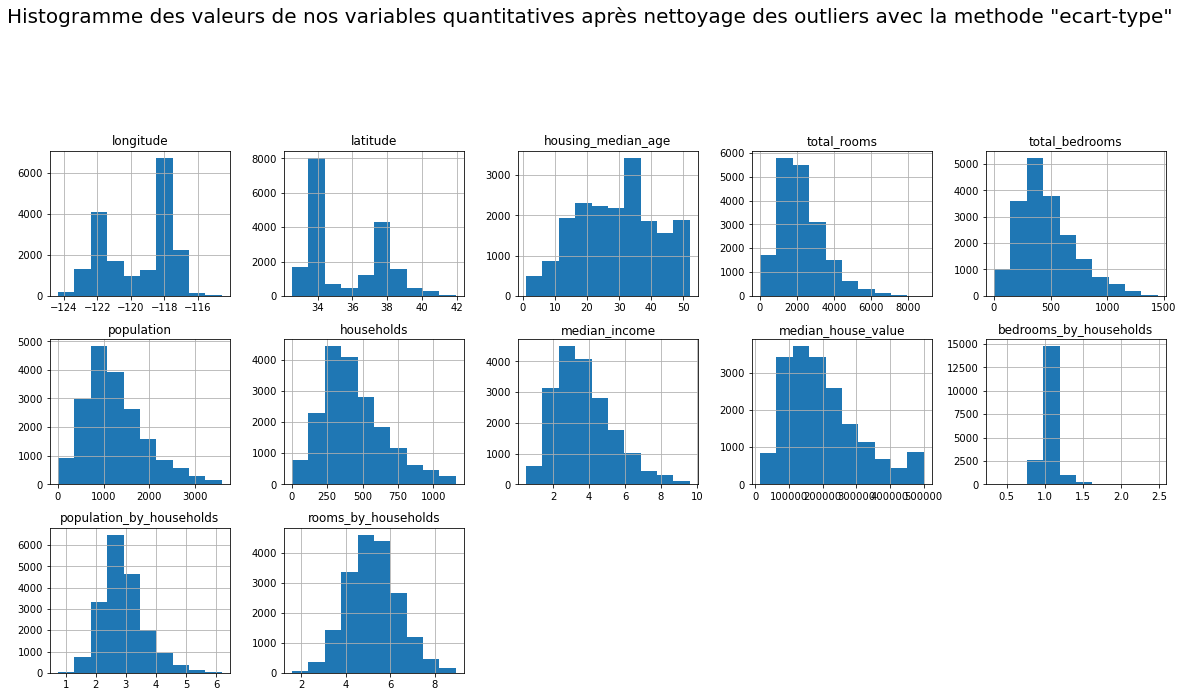

In [21]:
df.hist(figsize=(20,20), layout=(6,5))
plt.suptitle('Histogramme des valeurs de nos variables quantitatives après nettoyage des outliers avec la methode "ecart-type"',size=20)
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18748 entries, 0 to 20484
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 18748 non-null  float64
 1   latitude                  18748 non-null  float64
 2   housing_median_age        18748 non-null  float64
 3   total_rooms               18748 non-null  float64
 4   total_bedrooms            18748 non-null  float64
 5   population                18748 non-null  float64
 6   households                18748 non-null  float64
 7   median_income             18748 non-null  float64
 8   median_house_value        18748 non-null  float64
 9   ocean_proximity           18748 non-null  object 
 10  bedrooms_by_households    18748 non-null  float64
 11  population_by_households  18748 non-null  float64
 12  rooms_by_households       18748 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


<H1>Heatmap

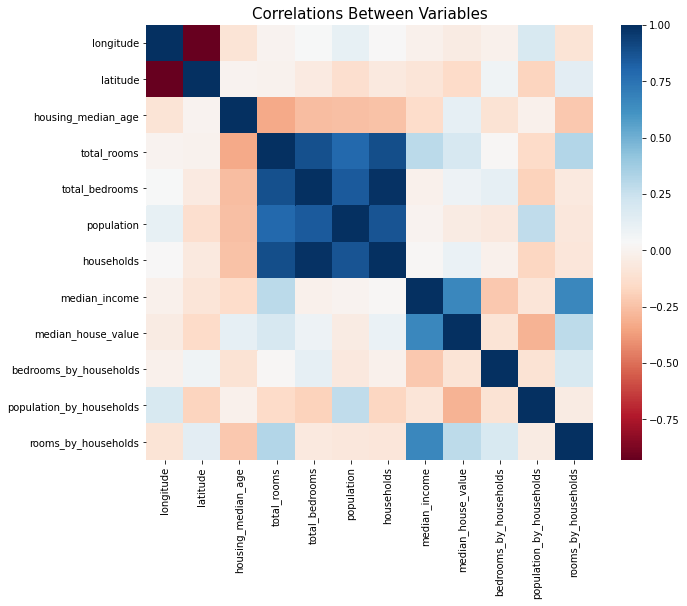

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [24]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_by_households,population_by_households,rooms_by_households
longitude,1.000000,-0.928609,-0.095960,-0.001113,0.037149,0.112555,0.035224,-0.013893,-0.042253,-0.010360,0.188417,-0.093879
latitude,-0.928609,1.000000,0.003204,-0.002872,-0.049897,-0.125265,-0.057649,-0.084971,-0.148277,0.075819,-0.175399,0.136027
housing_median_age,-0.095960,0.003204,1.000000,-0.326081,-0.263520,-0.251244,-0.250022,-0.140921,0.118825,-0.102178,-0.011025,-0.220804
total_rooms,-0.001113,-0.002872,-0.326081,1.000000,0.886625,0.793986,0.894421,0.296428,0.196207,0.023258,-0.151635,0.316894
total_bedrooms,0.037149,-0.049897,-0.263520,0.886625,1.000000,0.844713,0.985289,-0.011822,0.083611,0.124966,-0.188769,-0.061803
population,0.112555,-0.125265,-0.251244,0.793986,0.844713,1.000000,0.870907,0.002841,-0.044530,-0.066603,0.277620,-0.071782
households,0.035224,-0.057649,-0.250022,0.894421,0.985289,0.870907,1.000000,0.026199,0.098670,-0.014481,-0.169487,-0.082492
median_income,-0.013893,-0.084971,-0.140921,0.296428,-0.011822,0.002841,0.026199,1.000000,0.665930,-0.221673,-0.085636,0.661669
median_house_value,-0.042253,-0.148277,0.118825,0.196207,0.083611,-0.044530,0.098670,0.665930,1.000000,-0.096777,-0.297182,0.285352
bedrooms_by_households,-0.010360,0.075819,-0.102178,0.023258,0.124966,-0.066603,-0.014481,-0.221673,-0.096777,1.000000,-0.105431,0.191464


L'objectif étant de predire la variable median_house_value, on peux déjà noter les variables qui lui sont le plus corrélées:
- median_income 0.665930
- population_by_households -0.297182	
- rooms_by_households 0.285352

A noter que ce sont des niveaux de coorélation faibles voir très faibles.

<H1>Preparation des données pour le machine learning

In [25]:
dummies = pd.get_dummies(df.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20267,0,0,0,0,1
20268,0,0,0,0,1
20372,1,0,0,0,0
20460,1,0,0,0,0


In [26]:
df_mc = pd.concat([df,dummies],axis="columns")
df_mc = df_mc.drop(columns=["ocean_proximity"])

In [27]:
df_mc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_by_households,population_by_households,rooms_by_households,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.000000,322.0,126.0,8.3252,452600.0,1.023810,2.555556,6.984127,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.000000,2401.0,1138.0,8.3014,358500.0,0.971880,2.109842,6.238137,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.000000,496.0,177.0,7.2574,352100.0,1.073446,2.802260,8.288136,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.000000,558.0,219.0,5.6431,341300.0,1.073059,2.547945,5.817352,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.000000,565.0,259.0,3.8462,342200.0,1.081081,2.181467,6.281853,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,788.551250,3171.0,779.0,3.3409,220500.0,1.012261,4.070603,4.646983,0,0,0,0,1
20268,-119.18,34.19,19.0,2393.0,776.991579,1938.0,762.0,1.6953,167400.0,1.019674,2.543307,3.140420,0,0,0,0,1
20372,-118.88,34.17,15.0,4260.0,765.329834,1701.0,669.0,5.1033,410700.0,1.143991,2.542601,6.367713,1,0,0,0,0
20460,-118.75,34.29,17.0,5512.0,879.394743,2734.0,814.0,6.6073,258100.0,1.080338,3.358722,6.771499,1,0,0,0,0


In [28]:
X = df_mc.drop(columns=['median_house_value'])
Y = df_mc['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

<H1>Regression linéaire

In [29]:
model = make_pipeline(StandardScaler(), LinearRegression())
parms = {'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}
gscv = GridSearchCV(model, parms)
gscv.fit(X,Y)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False]})

In [30]:
gscv.best_params_

{'linearregression__fit_intercept': True, 'linearregression__normalize': True}

In [31]:
lin_reg = gscv.best_estimator_

In [32]:
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test,y_test)

0.6652581807172968

In [33]:
df["median_house_value_est_lin_reg"] = lin_reg.predict(X).reshape(-1,1)

<H1>Regression Polynomiale

In [34]:
model = make_pipeline(StandardScaler(), PolynomialFeatures(), LinearRegression())
parms = {'polynomialfeatures__degree': np.arange(2, 4), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}
gscv = GridSearchCV(model, parms)
gscv.fit(X,Y)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([2, 3])})

In [35]:
gscv.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 3}

In [36]:
poly_reg = gscv.best_estimator_

In [37]:
poly_reg.fit(X_train, y_train)
poly_reg.score(X_test,y_test)

0.7527354040103551

In [38]:
df["median_house_value_est_poly_reg"] = poly_reg.predict(X).reshape(-1,1)

<H1>RandomForestRegressor

In [40]:
model = RandomForestRegressor()
parms = {'n_estimators': [10,50,100,150,200,500]}
gscv = GridSearchCV(model, parms)
gscv.fit(X,Y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 50, 100, 150, 200, 500]})

In [41]:
gscv.best_estimator_

RandomForestRegressor()

In [42]:
rfr = Pipeline([('scaler', StandardScaler()), ('reg', gscv.best_estimator_)])

In [43]:
rfr.fit(X_train, y_train)
rfr.score(X_test,y_test)

0.7971423263062689

In [44]:
df["median_house_value_est_rfr"] = rfr.predict(X).reshape(-1,1)

<H1>KNeighborsRegressor

In [45]:
model = KNeighborsRegressor()
parms = {'n_neighbors': [10,25,50,75,100]}
gscv = GridSearchCV(model, parms)
gscv.fit(X,Y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [10, 25, 50, 75, 100]})

In [46]:
gscv.best_estimator_

KNeighborsRegressor(n_neighbors=50)

In [47]:
model = KNeighborsRegressor()
parms = {'n_neighbors': np.arange(15, 40)}
gscv = GridSearchCV(model, parms)
gscv.fit(X,Y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39])})

In [48]:
gscv.best_estimator_

KNeighborsRegressor(n_neighbors=36)

In [49]:
knr = Pipeline([('scaler', StandardScaler()), ('reg', gscv.best_estimator_)])
knr.fit(X_train, y_train)
knr.score(X_test,y_test)

0.7117001976648063

In [50]:
df["median_house_value_est_knr"] = knr.predict(X).reshape(-1,1)

<H1>Visualisation des données et des prédictions

<H3>Carte de la baie de San Francisco

In [51]:
kol = folium.Map(location=[38,-122], tiles='openstreetmap', zoom_start=8)

#folium.Marker([df.latitude[row],df.longitude[row]], tooltip=row).add_to(kol)

kol

<H3>Visualisation des différentes catégories de "ocean_proximity" 

C:\Users\33638\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


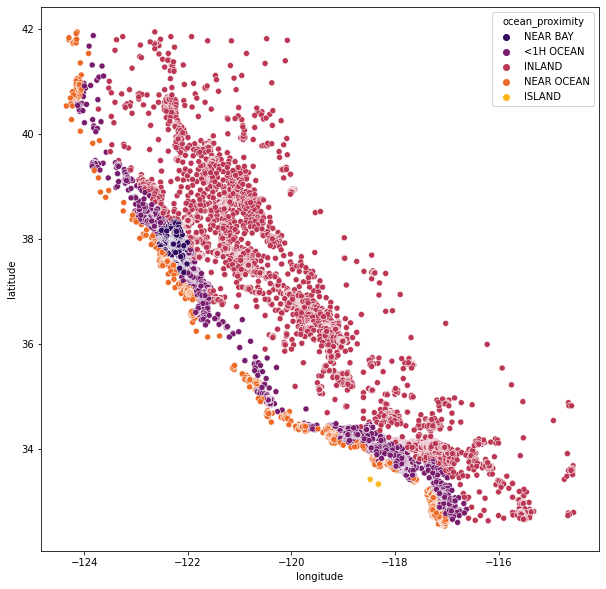

In [52]:
plt.figure(figsize=(10,10))
fig = sns.scatterplot(df.longitude, df.latitude, hue=df['ocean_proximity'],
                      legend=True, palette='inferno')

<H3>Visualisation des prix réels

C:\Users\33638\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


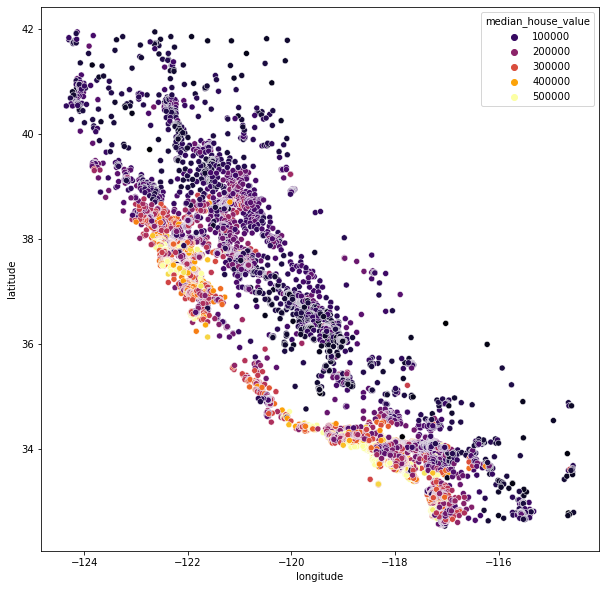

In [53]:
plt.figure(figsize=(10,10))
fig = sns.scatterplot(df.longitude, df.latitude, hue=df['median_house_value'],
                      legend=True, palette='inferno')

In [54]:
df['median_house_value'].min(),df['median_house_value'].max(),df['median_house_value'].mean(),df['median_house_value'].median()

(14999.0, 500001.0, 202010.84526349476, 177300.0)

<H3>Visualisation des prix estimés par regression linéaire

C:\Users\33638\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


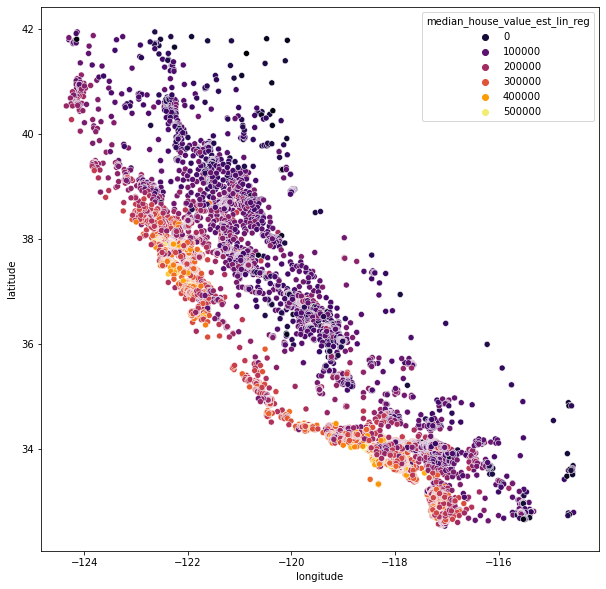

In [55]:
plt.figure(figsize=(10,10))
fig = sns.scatterplot(df.longitude, df.latitude, hue=df['median_house_value_est_lin_reg'],
                      legend=True, palette='inferno')

In [56]:
df['median_house_value_est_lin_reg'].min(),df['median_house_value_est_lin_reg'].max(),df['median_house_value_est_lin_reg'].mean(),df['median_house_value_est_lin_reg'].median()

(-55358.05048040481, 530241.9495195951, 201981.94994633796, 201101.9495195952)

<H3>Visualisation des prix estimés par regression polynomiale

C:\Users\33638\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


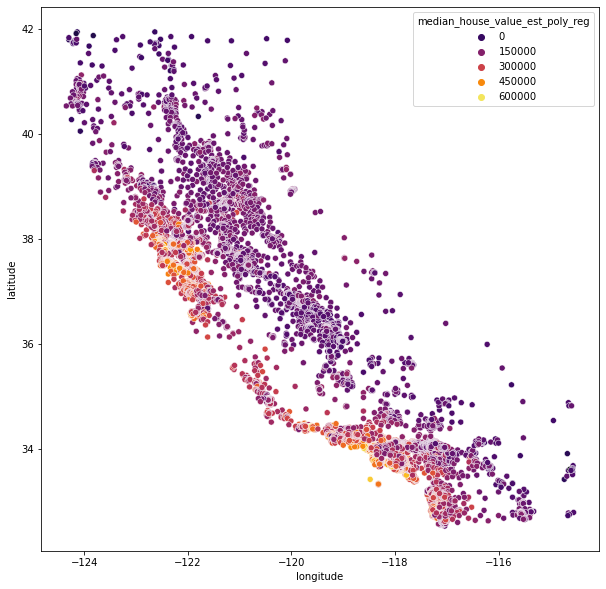

In [57]:
plt.figure(figsize=(10,10))
fig = sns.scatterplot(df.longitude, df.latitude, hue=df['median_house_value_est_poly_reg'],
                      legend=True, palette='inferno')

In [58]:
df['median_house_value_est_poly_reg'].min(),df['median_house_value_est_poly_reg'].max(),df['median_house_value_est_poly_reg'].mean(),df['median_house_value_est_poly_reg'].median()

(-137303.2699569892, 657529.5289039838, 202045.6705875717, 185652.9379670505)

<H3>Visualisation des prix estimés par RandomForestRegressor

C:\Users\33638\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


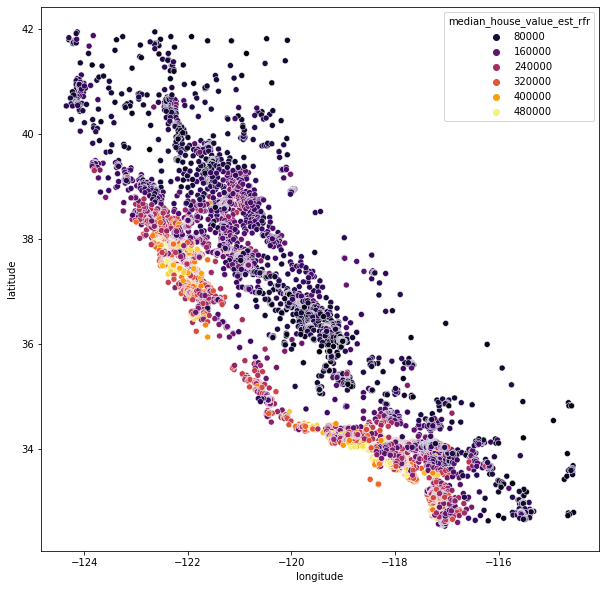

In [59]:
plt.figure(figsize=(10,10))
fig = sns.scatterplot(df.longitude, df.latitude, hue=df['median_house_value_est_rfr'],
                      legend=True, palette='inferno')

In [60]:
df['median_house_value_est_rfr'].min(),df['median_house_value_est_rfr'].max(),df['median_house_value_est_rfr'].mean(),df['median_house_value_est_rfr'].median()

(30932.28, 500001.0, 202482.2382339515, 183381.0)

<H3>Visualisation des prix estimés par KNeighborsRegressor

C:\Users\33638\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


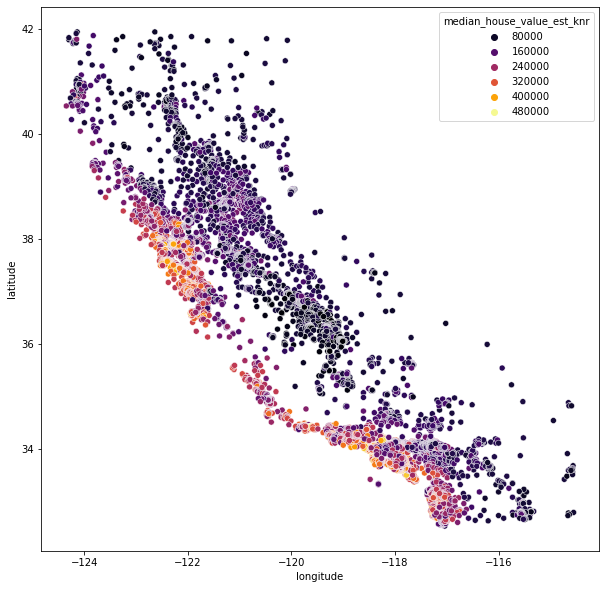

In [61]:
plt.figure(figsize=(10,10))
fig = sns.scatterplot(df.longitude, df.latitude, hue=df['median_house_value_est_knr'],
                      legend=True, palette='inferno')

In [62]:
df['median_house_value_est_knr'].min(),df['median_house_value_est_knr'].max(),df['median_house_value_est_knr'].mean(),df['median_house_value_est_knr'].median()

(50747.22222222222, 490036.97222222225, 198970.08990144212, 190747.23611111112)

<H1>Conclusion Projet Logement

In [63]:
df_resultat = pd.DataFrame.from_dict({'Prix réel': [1, df.median_house_value.min(), df.median_house_value.max(), df.median_house_value.mean(), df.median_house_value.median(),df.describe().median_house_value[2]],
                                      'Prix estimés par régression linéaire': [lin_reg.score(X_test,y_test), df.median_house_value_est_lin_reg.min(), df.median_house_value_est_lin_reg.max(), df.median_house_value_est_lin_reg.mean(), df.median_house_value_est_lin_reg.median(),df.describe().median_house_value_est_lin_reg[2]],
                                      'Prix estimés par régression polynomiale': [poly_reg.score(X_test,y_test), df.median_house_value_est_poly_reg.min(), df.median_house_value_est_poly_reg.max(), df.median_house_value_est_poly_reg.mean(), df.median_house_value_est_poly_reg.median(),df.describe().median_house_value_est_poly_reg[2]],
                                      'Prix estimés par RandomForestRegressor': [rfr.score(X_test,y_test), df.median_house_value_est_rfr.min(), df.median_house_value_est_rfr.max(), df.median_house_value_est_rfr.mean(), df.median_house_value_est_rfr.median(),df.describe().median_house_value_est_rfr[2]],
                                      'Prix estimés par KNeighborsRegressor': [knr.score(X_test,y_test), df.median_house_value_est_knr.min(), df.median_house_value_est_knr.max(), df.median_house_value_est_knr.mean(), df.median_house_value_est_knr.median(),df.describe().median_house_value_est_knr[2]]},
                                     orient = 'index',
                                     columns=["Score","Prix Minimum","Prix Maximum","Prix Moyen","Prix Médian","Ecart-Type"])

In [64]:
df_resultat

,Score,Prix Minimum,Prix Maximum,Prix Moyen,Prix Médian,Ecart-Type
Prix réel,1.000000,14999.000000,500001.000000,202010.845263,177300.000000,111033.740372
Prix estimés par régression linéaire,0.665258,-55358.050480,530241.949520,201981.949946,201101.949520,90504.277500
Prix estimés par régression polynomiale,0.752735,-137303.269957,657529.528904,202045.670588,185652.937967,99150.605961
Prix estimés par RandomForestRegressor,0.797142,30932.280000,500001.000000,202482.238234,183381.000000,102487.034637
Prix estimés par KNeighborsRegressor,0.711700,50747.222222,490036.972222,198970.089901,190747.236111,84265.830516


<b>D'après nos résultats, on peux conclure que le meilleur algorythme de prédiction parmis les 4 utilisés est le RandomForestRegressor. Notamment car il présente le meilleur score mais aussi car il ne donne pas de prédiction de prix négative comme les algorythmes de regression linéaire et polynomiale mais aussi car l'écart-type, la médiane et la moyenne des prédictions sont cohérentes avec celles des prix réels. On note cependant que les valeurs de predictions les plus basses sont moins précises et que les 4 algos ont des difficultés ce point. Enfin si on regarde les cartes de predictions utilisant les coordonnées des maisons, on remarque que pour les deux algos RandomForestRegressor et KNeighborsRegressor donne visuellement des cartes resemblant à celle des prix réels.